## Vehicle Detection Project

In this notebook we will put together all the buildings blocks in creating a pipeline for detecting vehicles in a given video.

In [1]:
# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import pickle

from helper_functions import *

%matplotlib inline

Let's import the already trained model.

In [4]:
dist_pickle = pickle.load(open("dist_pickle.p", "rb" ))
svc = dist_pickle["svc"]
X_scaler = dist_pickle["scaler"]
orient = dist_pickle["orient"]
color_space = dist_pickle["color_space"]
pix_per_cell = dist_pickle["pix_per_cell"]
cell_per_block = dist_pickle["cell_per_block"]
spatial_size = dist_pickle["spatial_size"]
hist_bins = dist_pickle["hist_bins"]
hog_channel = dist_pickle["hog_channel"]

Let's try it out and see that everything was properly imported.

/usr/local/miniconda3/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


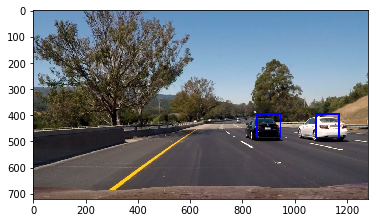

In [6]:
highway_img = mpimg.imread('test_images/test6.jpg')
draw_image = np.copy(highway_img)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

y_start_stop = [350, None] # Min and max in y to search in slide_window()

windows = slide_window(highway_img, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(90, 90), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(highway_img, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)

Ok, seems like everything is still running, let's go ahead and build the rest of the pipeline now.

Now let's run the pipeline on some videos.

In [9]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

### Test Video

In [ ]:
output = 'result_test.mp4'
clip1 = VideoFileClip("test_video.mp4")
result_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time result_clip.write_videofile(output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))

### Project Video

In [ ]:
output = 'result.mp4'
clip1 = VideoFileClip("project_video.mp4")
result_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time result_clip.write_videofile(output, audio=False)

In [ ]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))